# Importing required liberary

In [15]:
import pandas as pd
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Updating Data

In [16]:
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Dehire\Plastic\cleaned_monthly_Plastic_data.csv", parse_dates=['date'])
df = df.rename({'date': 'month','yhat': 'count'}, axis = 1)
df

month  quantity
0  2019-12-01     10942
1  2020-01-01     11941
2  2020-02-01     12103
3  2020-03-01     12793
4  2020-04-01     12169
5  2020-05-01     12374
6  2020-06-01     12185
7  2020-07-01     12389
8  2020-08-01     12345
9  2020-09-01     12149
10 2020-10-01     12642
11 2020-11-01     12891
12 2020-12-01     11789
13 2021-01-01     12788
14 2021-02-01     12950
15 2021-03-01     13640
16 2021-04-01     13016
17 2021-05-01     13221
18 2021-06-01     13032
19 2021-07-01     13236
20 2021-08-01     13192
21 2021-09-01     12996
22 2021-10-01     13489
23 2021-11-01     13738
24 2021-12-01     12636
25 2022-01-01     13635
26 2022-02-01     13797
27 2022-03-01     14487
28 2022-04-01     13863
29 2022-05-01     14068
30 2022-06-01     13879
31 2022-07-01     14083
32 2022-08-01     14039
33 2022-09-01     13844
34 2022-10-01     14336
35 2022-11-01     14585

In [17]:
df.columns=['ds','y']

In [18]:
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

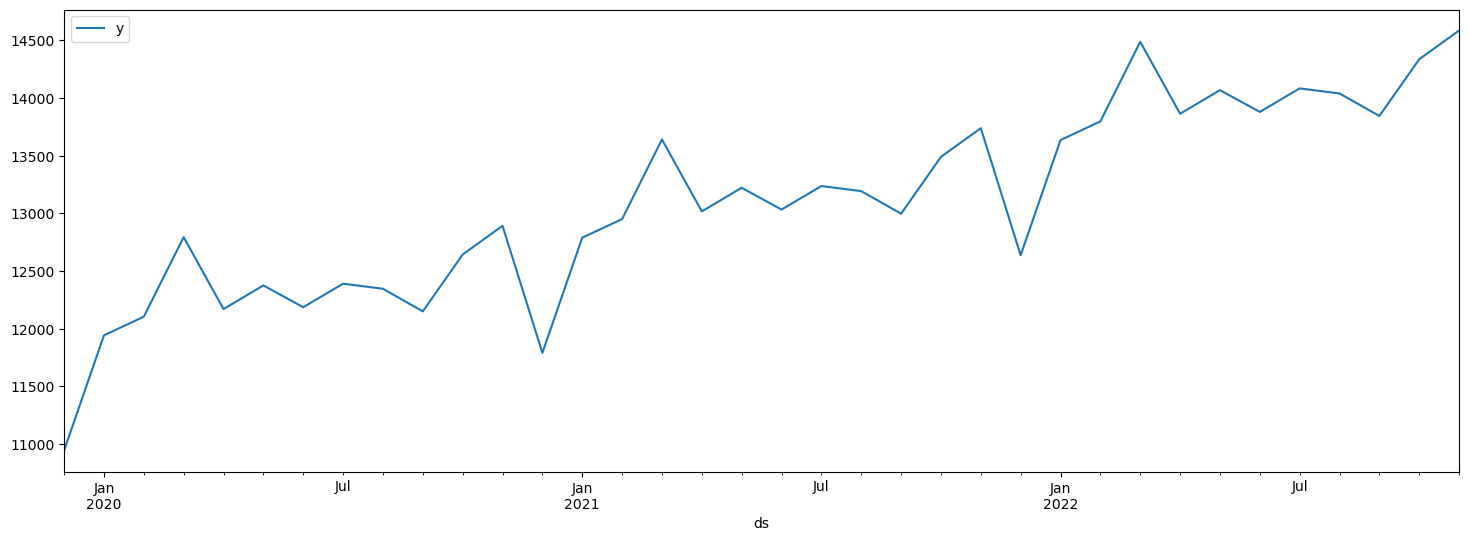

In [19]:
df.plot(x='ds',y='y',figsize=(18,6))

In [20]:
train=df[:24]
test=df[24:]

In [21]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

11:03:31 - cmdstanpy - INFO - Chain [1] start processing
11:03:31 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
forecast.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
384 2022-10-28  14443.032423  13973.561728  14872.363681  14442.871774   
385 2022-10-29  14445.529457  13988.252746  14881.517794  14445.368037   
386 2022-10-30  14448.026492  13992.705086  14884.797888  14447.863994   
387 2022-10-31  14450.523526  13968.553724  14918.745523  14450.359952   
388 2022-11-01  14453.020560  14034.440017  14930.191497  14452.855909   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
384  14443.180124             0.0                   0.0                   0.0   
385  14445.677885             0.0                   0.0                   0.0   
386  14448.175598             0.0                   0.0                   0.0   
387  14450.673301             0.0                   0.0                   0.0   
388  14453.170779             0.0                   0.0                   0.0   

     multiplicative_terms  multiplicative_terms_lower  \
384                   0.0                         0.0   
385                   0.0                         0.0   
386                   0.0                         0.0   
387                   0.0                         0.0   
388                   0.0                         0.0   

     multiplicative_terms_upper          yhat  
384                         0.0  14443.032423  
385                         0.0  14445.529457  
386                         0.0  14448.026492  
387                         0.0  14450.523526  
388                         0.0  14453.020560

In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
384 2022-10-28  14443.032423  13973.561728  14872.363681
385 2022-10-29  14445.529457  13988.252746  14881.517794
386 2022-10-30  14448.026492  13992.705086  14884.797888
387 2022-10-31  14450.523526  13968.553724  14918.745523
388 2022-11-01  14453.020560  14034.440017  14930.191497

In [24]:
plot_plotly(m ,forecast)

In [25]:
plot_components_plotly(m,forecast)

In [26]:
from statsmodels.tools.eval_measures import rmse

In [27]:
predictions = forecast.iloc[-12:]['yhat']

In [28]:
#RMSE between actual and  predicted values
print("RMSE",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

RMSE 689.5679975057021
Mean Value of Test Dataset: 13937.666666666666
